<a href="https://colab.research.google.com/github/dynasty-29/kdramas_Eda/blob/main/Kdramas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

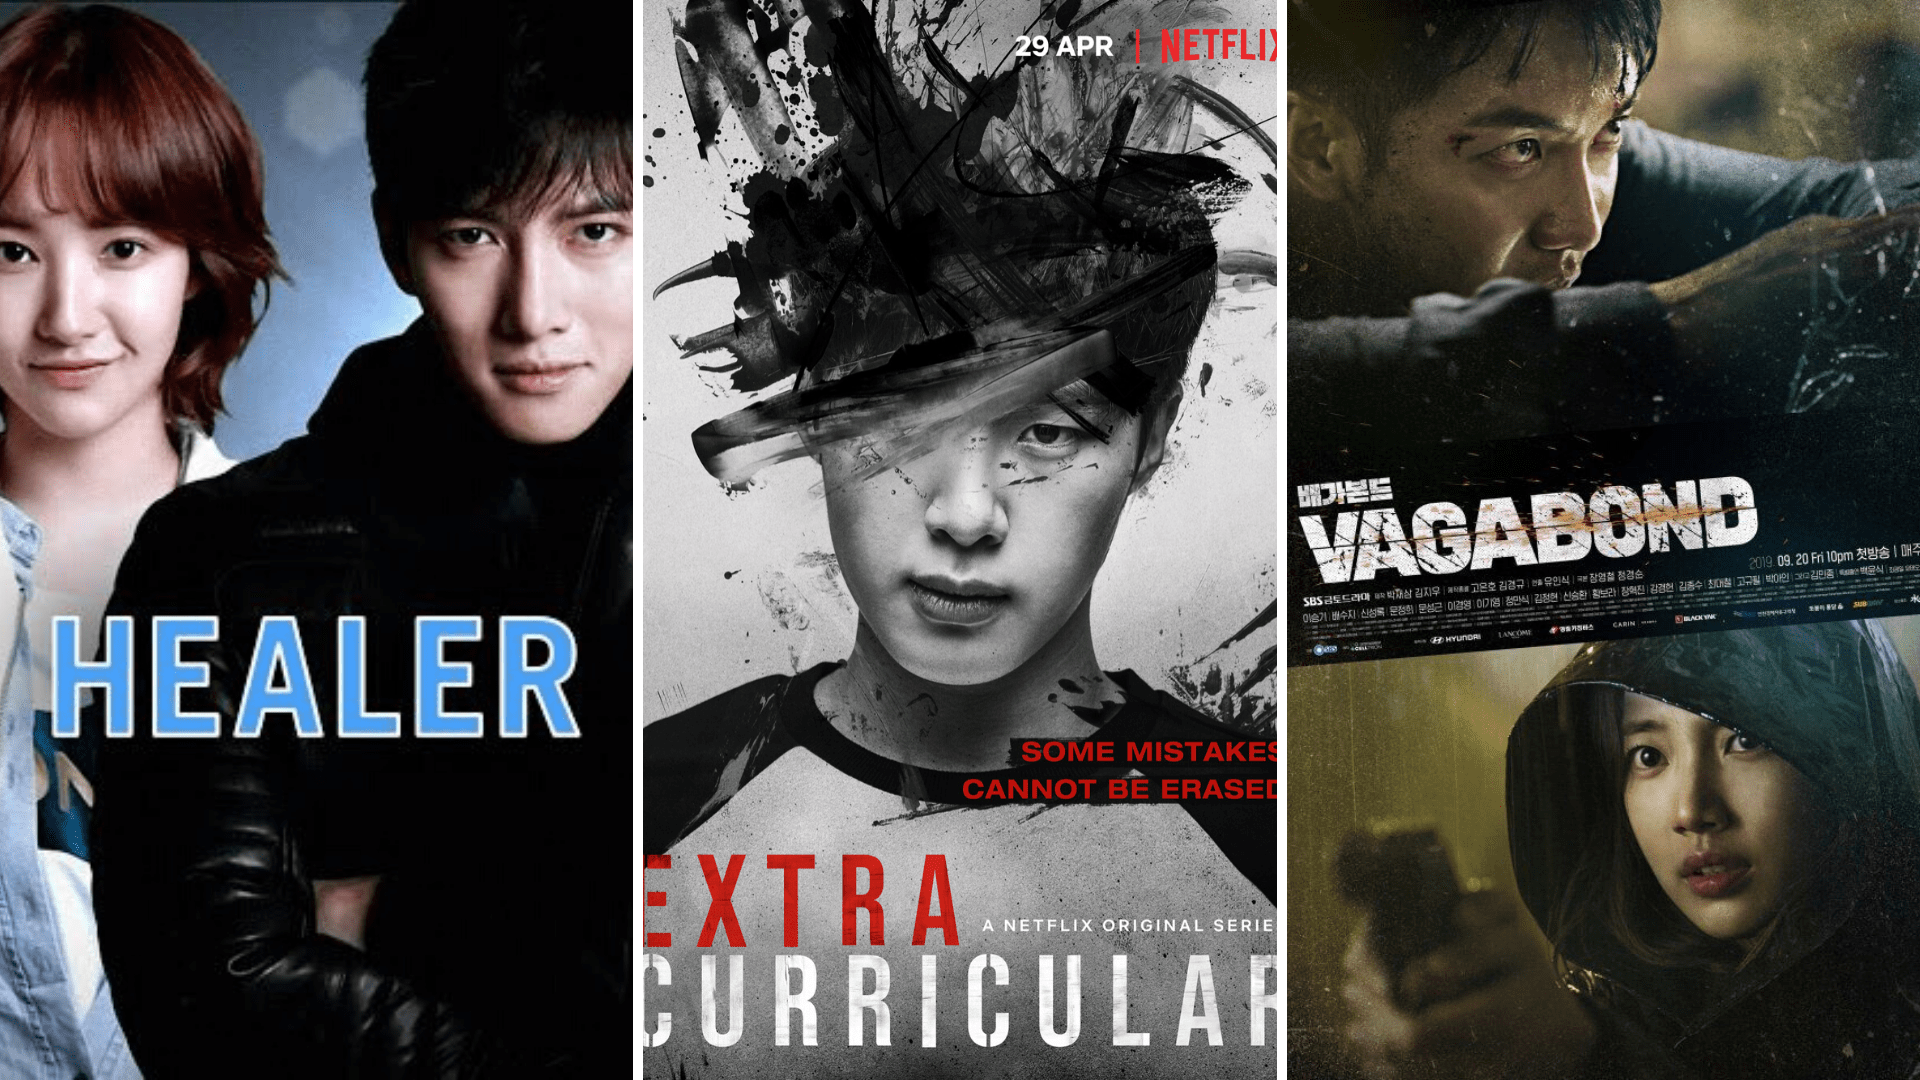
## **Kdramas EDA**

## **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

## **Loading the data set and preview**

In [2]:
df = pd.read_csv("kdramas.csv")

In [3]:
#Shape 
df.shape

(2030, 6)

In [4]:
#First five rows
df.head()

,Name of kdrama,Year of relase,Watchtime,Movie Rating,Genre,Votes
0,Vroomiz,2012,11.0,4.9,Animation,29.0
1,Goodbye Earth,2023,NaN,NaN,Drama,NaN
2,Song of the Bandits,2023,NaN,NaN,Action,NaN
3,Extraordinary Attorney Woo,2022,75.0,9.0,Drama,5887.0
4,A Model Family,2022,45.0,6.6,Crime,558.0


In [5]:
#Last five rows
df.tail()

,Name of kdrama,Year of relase,Watchtime,Movie Rating,Genre,Votes
2025,The Transformers,1984,30.0,8.0,Animation,22005.0
2026,A High School Student's Diary,1983,NaN,NaN,Family,NaN
2027,Pung-un,1982,NaN,NaN,Drama,NaN
2028,Kokyo Sang Ilgi,1982,NaN,NaN,Family,NaN
2029,A Time Called You,2023,NaN,NaN,Drama,NaN


In [6]:
#Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name of kdrama  2030 non-null   object 
 1   Year of relase  2030 non-null   int64  
 2   Watchtime       1086 non-null   float64
 3   Movie Rating    1575 non-null   float64
 4   Genre           1971 non-null   object 
 5   Votes           1579 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 95.3+ KB


### **Data cleaning**

In [7]:
#Column Renaming
df = df.rename(columns={'Name of kdrama': 'Name_of_kdrama', 'Year of relase':'Year_of_release', 'Movie Rating':'Rating'})
df.head(2)

,Name_of_kdrama,Year_of_release,Watchtime,Rating,Genre,Votes
0,Vroomiz,2012,11.0,4.9,Animation,29.0
1,Goodbye Earth,2023,NaN,NaN,Drama,NaN


In [8]:
#Checking for nulls
df.isnull().sum()

Name_of_kdrama       0
Year_of_release      0
Watchtime          944
Rating             455
Genre               59
Votes              451
dtype: int64

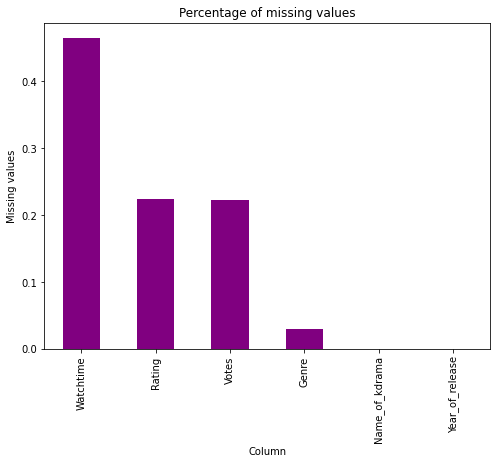

In [9]:
# Visualising missing values
#
df.isna().mean().round(4).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6), color = 'Purple')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

In [10]:
#checking if these data points are skewed to decided on how to deal with nulls
df.Votes.skew()

35.45281785072274

In [11]:
df.Rating.skew()

-1.00878689655275

In [12]:
df.Watchtime.skew()

12.080140007768257

In [13]:
#All the numerical columns have skewed data so will replace with median
df['Votes'].fillna(df['Votes'].median(),inplace=True)
df['Rating'].fillna(df['Rating'].median(),inplace=True)
df['Watchtime'].fillna(df['Watchtime'].median(),inplace=True)

In [14]:
#Will drop all rows with null values in column genre
data = df.dropna()

In [15]:
# Checking 
data.isnull().sum()

Name_of_kdrama     0
Year_of_release    0
Watchtime          0
Rating             0
Genre              0
Votes              0
dtype: int64

In [16]:
data.shape

(1971, 6)

In [17]:
#checking for duplicates
data.duplicated().sum()

1

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
#checking for duplicates
data.duplicated().sum()

0

In [20]:
#Checking for Anomalies
# 1. Rating is from 0 to 10 and not above
print(data['Rating'].max())
print(data['Rating'].min())

9.8
2.4


In [21]:
#2. Watchtime shouldn't have a negative value
print(data['Watchtime'].max())
print(data['Watchtime'].min())

960.0
1.0


We have quite a big difference. will deal with them in outlier section


In [22]:
#2. Year of release should be a valid year
print(data['Year_of_release'].max())
print(data['Year_of_release'].min())

2023
1982


will drop all rows with year 2023

In [23]:
data[data['Year_of_release']==2023]

,Name_of_kdrama,Year_of_release,Watchtime,Rating,Genre,Votes
1,Goodbye Earth,2023,60.0,7.5,Drama,98.0
2,Song of the Bandits,2023,60.0,7.5,Action,98.0
2029,A Time Called You,2023,60.0,7.5,Drama,98.0


In [24]:
update_df = data.drop([1, 2, 2029])

In [25]:
update_df.shape

(1967, 6)

In [26]:
# Checking for Ouliers
q1 = update_df.quantile(0.25)
q3 = update_df.quantile(0.75)
iqr = q3 - q1
outliers = update_df[((update_df < (q1 - 1.5*iqr))|(update_df > (q3 + 1.5*iqr)))]
outliers.count()


Name_of_kdrama       0
Year_of_release     44
Watchtime          776
Rating             131
Genre                0
Votes              324
dtype: int64

We have outliers but will not get rid of them

## **EDA**

In [27]:
# summary statistics
update_df.describe()


,Year_of_release,Watchtime,Rating,Votes
count,1967.000000,1967.000000,1967.000000,1967.000000
mean,2013.387392,57.657855,7.399898,1002.757397
std,6.467573,37.368751,0.755441,10095.702124
min,1982.000000,1.000000,2.400000,5.000000
25%,2010.000000,60.000000,7.100000,41.000000
50%,2015.000000,60.000000,7.500000,98.000000
75%,2018.000000,60.000000,7.800000,311.500000
max,2022.000000,960.000000,9.800000,430973.000000


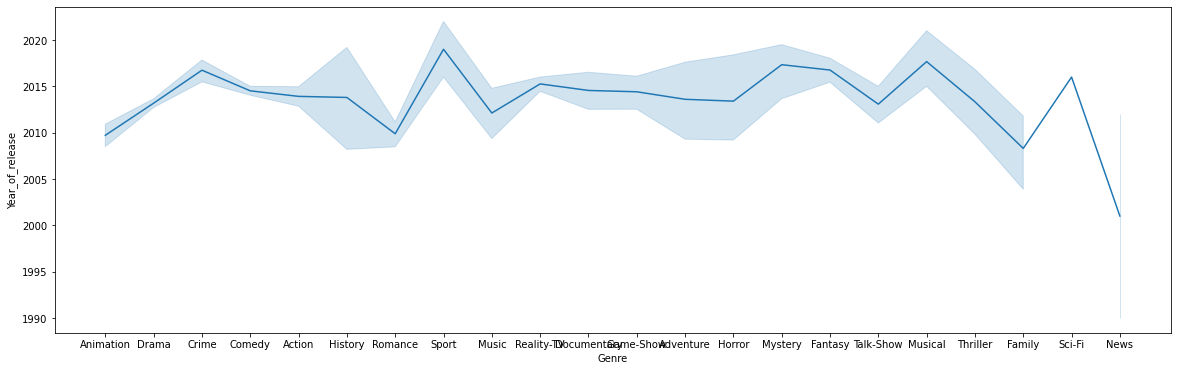

In [48]:
# Year distribution
fig, ax = plt.subplots(figsize=(20, 6))
sns.lineplot(y="Year_of_release", x="Genre", data=update_df)
plt.show()

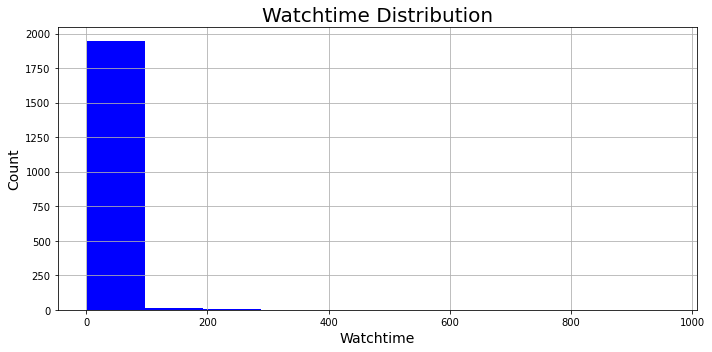

In [29]:
#Watch Time Distribution plot
data['Watchtime'].hist(bins = 10, figsize = (10,5), color = 'blue')
plt.title('Watchtime Distribution', fontsize=20)
plt.xlabel('Watchtime', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()


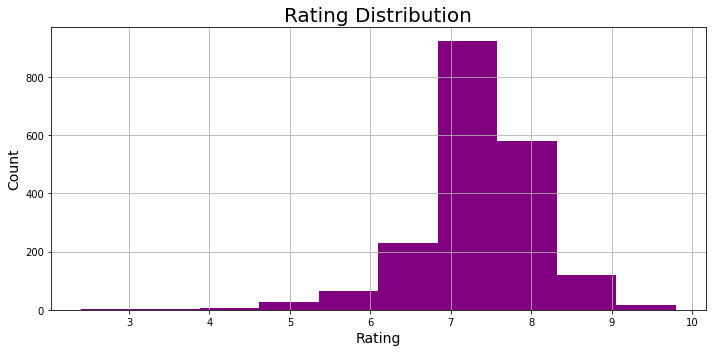

In [30]:
#Rating Distribution plot
data['Rating'].hist(bins = 10, figsize = (10,5), color = 'Purple')
plt.title('Rating Distribution', fontsize=20)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

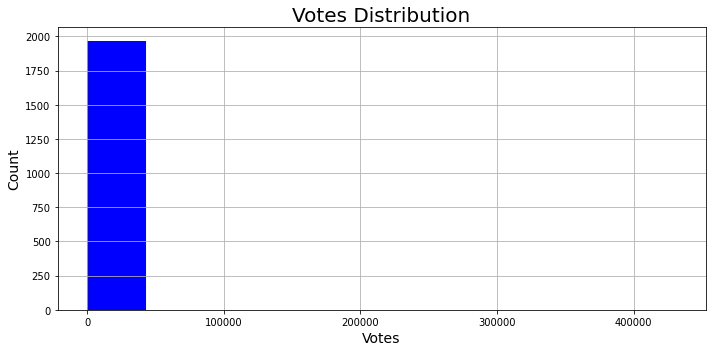

In [31]:
#Votes Distribution plot
data['Votes'].hist(figsize = (10,5), color = 'blue')
plt.title('Votes Distribution', fontsize=20)
plt.xlabel('Votes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

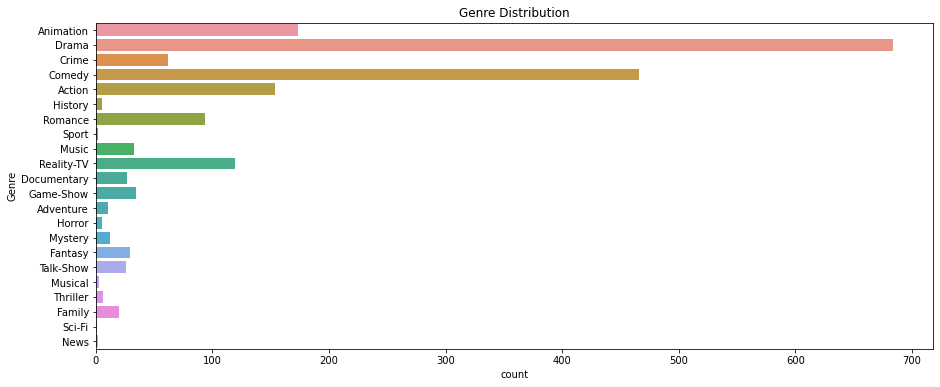

In [32]:
# Genre
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(y="Genre", data=update_df).set(title='Genre Distribution')

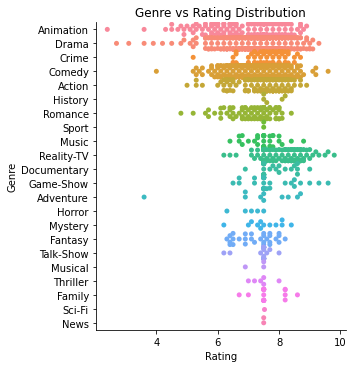

In [33]:
#Genre by Rating
sns.catplot(y="Genre", x="Rating", kind="swarm", data=update_df).set(title='Genre vs Rating Distribution')

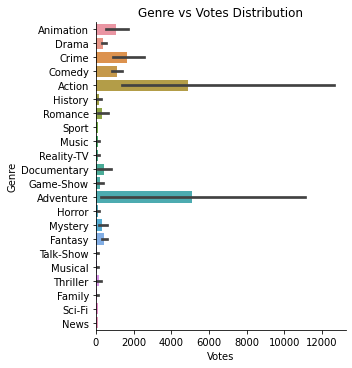

In [34]:
#Genre by Votes
sns.catplot(y="Genre", x="Votes", kind="bar", data=update_df).set(title='Genre vs Votes Distribution')

In [45]:
#Top rated shows as per Imdb Rating
toprated = pd.pivot_table(update_df,values=['Rating'],index=['Name_of_kdrama', 'Genre', 'Year_of_release'],aggfunc=max)
toprated.sort_values(by='Rating',ascending=0).head(10)

,,,Rating
Name_of_kdrama,Genre,Year_of_release,
Irene's Work & Holiday,Reality-TV,2022,9.8
BTS: Bon Voyage,Reality-TV,2016,9.6
More Charming by the Day,Comedy,2010,9.6
Run BTS!,Game-Show,2015,9.6
In the SOOP BTS Ver.,Reality-TV,2020,9.5
BTS Gayo,Game-Show,2015,9.3
Hwangholhan Yiwoot: Enchanting Neighbor,Drama,2015,9.3
Jung Hae In's Travel Log,Reality-TV,2019,9.3
NCT Life: Hot & Young Seoul Trip,Reality-TV,2018,9.2


In [41]:
#Least rated shows as per Imdb Rating
Leastrated = pd.pivot_table(update_df,values=['Rating'],index=['Name_of_kdrama', 'Genre', 'Year_of_release'],aggfunc=max)
Leastrated.sort_values(by='Rating').head(20)

,,,Rating
Name_of_kdrama,Genre,Year_of_release,
Baby Shark's Big Show!,Animation,2020,2.4
Unknown Woman,Drama,2017,2.7
Strangers 6,Drama,2012,3.1
Super Duper Sumos,Adventure,2001,3.6
"The King of Tears, Lee Bang-won",Drama,2021,3.6
Tickety Toc,Animation,2011,3.6
Let's Look at the Sunset Holding Hands,Drama,2018,3.9
Racket Boys,Comedy,2021,4.0
Magic Cellphone,Drama,2016,4.2


In [40]:
#Top Voted shows as per Imdb Rating
topvoted = pd.pivot_table(update_df,values=['Votes'],index=['Name_of_kdrama', 'Genre', 'Year_of_release'],aggfunc=max)
topvoted.sort_values(by='Votes',ascending=0).head(10)

,,,Votes
Name_of_kdrama,Genre,Year_of_release,
Squid Game,Action,2021,430973.0
All of Us Are Dead,Action,2022,46500.0
Kingdom,Action,2019,45420.0
The Boondocks,Animation,2005,30661.0
Racket Boys,Comedy,2021,27592.0
Crash Landing on You,Adventure,2019,27359.0
Star Wars: Clone Wars,Animation,2003,26327.0
Hellbound,Crime,2021,23479.0
It's Okay to Not Be Okay,Comedy,2020,22955.0


In [43]:
#Least Voted shows as per Imdb Rating
Leastvoted = pd.pivot_table(update_df,values=['Votes'],index=['Name_of_kdrama', 'Genre', 'Year_of_release'],aggfunc=max)
Leastvoted.sort_values(by='Votes').head(20)

,,,Votes
Name_of_kdrama,Genre,Year_of_release,
Sweet Buns,Drama,2004,5.0
Kimcheed Radish,Drama,2007,5.0
White Lies,Drama,2008,5.0
NCT Life in Seoul,Reality-TV,2016,5.0
NCT Life: DREAM in Wonderland,Reality-TV,2020,5.0
"Toji, the Land",Drama,2004,5.0
Three Brothers,Romance,2009,5.0
Leobing Yu,Drama,2002,5.0
Real Men 300,Documentary,2018,5.0
